In [9]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

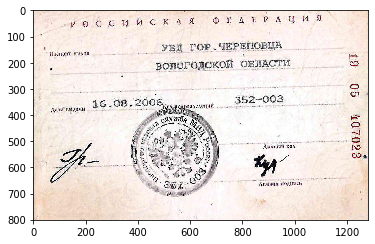

In [10]:
alpha = 3 #Угол поворота

bb = [(478, 121, 106, 50),
    (207, 312, 308, 73),
    (789, 175, 203, 54),
    (461, 180, 310, 64),
    (755, 310, 206, 50),
    (600, 110, 354, 56)]
img  = cv2.imread('/home/ad/test/test1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [11]:
#Посчитаем матрицу поворота
(H, W) = img.shape[:2]
(cX, cY) = (W // 2, H // 2) # вокруг центра будем поворачивать
M = cv2.getRotationMatrix2D((cX, cY), -alpha, 1.0)
# #Если хотим компенсировать вызванное поворотом уменьшение изображения (чтобы не обрезались углы):
# cos = np.abs(M[0, 0])
# sin = np.abs(M[0, 1])
# W = int((H * sin) + (W * cos))
# H = int((H * cos) + (W * sin))
# M[0, 2] += (W / 2) - cX
# M[1, 2] += (H / 2) - cY


Способ №1. 

Поскольку задание звучит как "Требуется по заданному углу отрисовать довернутое изображение, где образовавшиеся края заполнить черным и отрисовать новые боксы.", достаточно сначала нарисовать прямоугольники, а затем повернуть изображение вместе с ними:

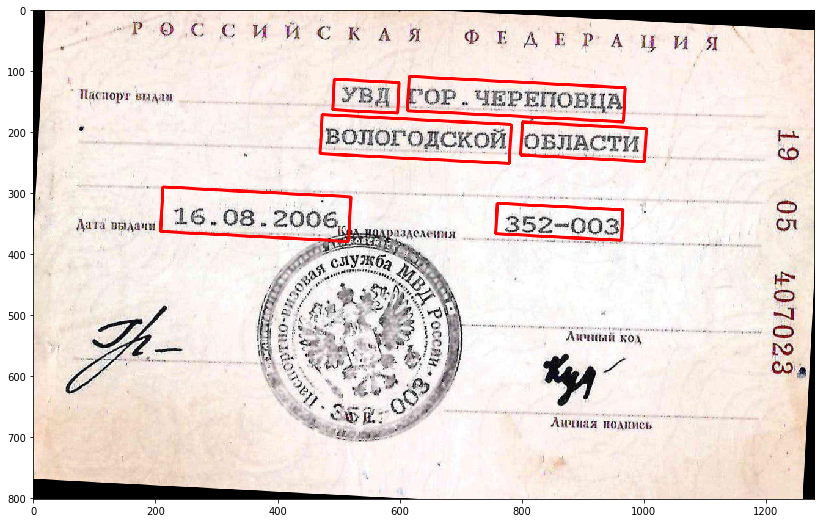

In [12]:
img1 = img.copy()
for x,y,w,h in bb:
    cv2.rectangle(img1, (x,y), (x+w,y+h), (255, 0, 0), 3)
rotated = cv2.warpAffine(img1, M, (W, H))
plt.figure(figsize=(14,20))
plt.imshow(rotated)

<h>
Способ 2. Если хочется отдельно поворачивать изображение и отдельно прямоугольники
    </h>

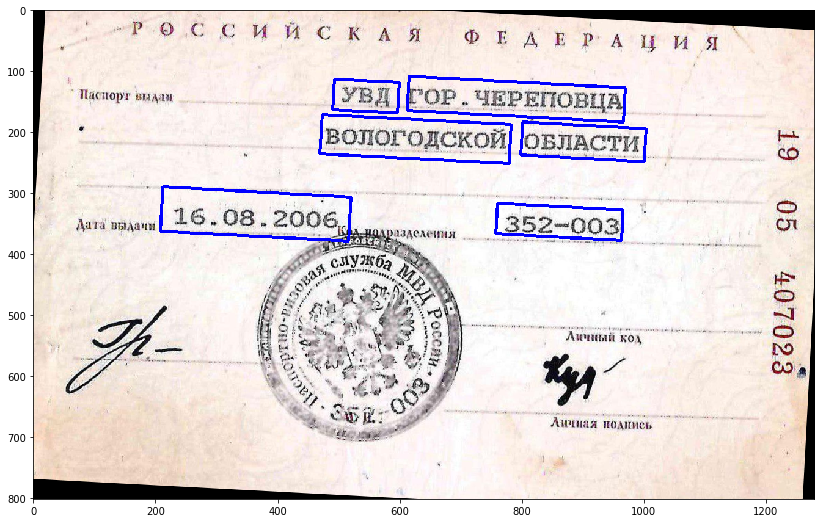

In [14]:
#Рисуем повернутое изображение:
rotated2 = cv2.warpAffine(img.copy(), M, (W, H))
#РИсуем повернутые прямоугольники 
for x,y,w,h in bb:
    pts = np.array([[x,y],[x+w,y],[x+w,y+h],[x,y+h]], np.int32)
    pts = pts.reshape((-1,1,2))
    pts_rotated = cv2.transform(pts,M)
    cv2.polylines(rotated2,[pts_rotated],True,(0,0,255),3)
plt.figure(figsize=(14,20))
plt.imshow(rotated2)